## Importing necessary modules 


In [1]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import torch

In [3]:
from torch.utils.data import Dataset, DataLoader

## Extracting FashionMNIST dataset

In [4]:
train_data=torchvision.datasets.FashionMNIST("./data",download=True,transform=torchvision.transforms.Compose([transforms.ToTensor()]))

In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
test_data=torchvision.datasets.FashionMNIST("/.data",download=True,train=False,transform=torchvision.transforms.Compose([transforms.ToTensor()]))

In [7]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [8]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

In [9]:
predictions_list = []
labels_list = []

In [10]:
# Loading our data
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=100)

In [11]:
train_loader

###We have 10 types of clothes in FashionMNIST dataset.
####Making a method that return the name of class for the label number. ex. if the label is 5, we return Sandal.

In [12]:
def output_label(label):
  output_mapping = {
      0: "T-shirt/Top",
      1: "Trouser",
      2: "Pullover",
      3: "Dress",
      4: "Coat", 
      5: "Sandal", 
      6: "Shirt",
      7: "Sneaker",
      8: "Bag",
      9: "Ankle Boot"}
  input = (label.item() if type(label) == torch.Tensor else label)
  return output_mapping[input]

#### Visualising some images

In [13]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

9


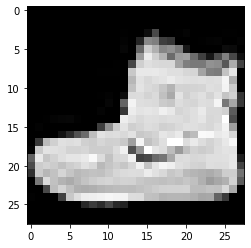

In [14]:
image, label = next(iter(train_data))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

### Defining out basic neural network of two linear layers

In [15]:
class FashionNN(nn.Module):
    def __init__(self):
      super(FashionNN, self).__init__()
      input_dim, hidden1, output_dim = 784, 100, 10
      self.fc1 = nn.Linear(input_dim, hidden1) 
      self.fc2 = nn.Linear(hidden1, output_dim)
        

    def forward(self, x):
      x = self.fc1(x)
      x = self.fc2(x)
      x=x.view(x.size(0),-1)
      return x

#### Using CrossEntropyLoss()
#### Using Adam optimizer for optimization 

In [16]:
model = FashionNN()

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [17]:
model.to("cpu")

FashionNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

### Training and testing our model with the dataset we genereated

In [18]:
for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to("cpu"), labels.to("cpu")
    train = images.reshape(images.size(0),-1)
    labels = Variable(labels)

    # Forward pass
    outputs = model(train)
    loss = error(outputs, labels)
    # Initializing a gradient as 0 so there is no mixing of gradient among the batches
    optimizer.zero_grad()

    #Propagating the error backward
    loss.backward()
    # Optimizing the parameters
    optimizer.step()
    
    count += 1
    
# Testing the model
    
    if not (count % 50):
       total = 0
       correct = 0
       for images, labels in test_loader:
         images, labels = images.to("cpu"), labels.to("cpu")
         labels_list.append(labels)
         test = images.reshape(images.size(0),-1)
         
         outputs = model(test)
            
         predictions = torch.max(outputs, 1)[1].to("cpu")
         predictions_list.append(predictions)
         correct += (predictions == labels).sum()
            
         total += len(labels)
            
         accuracy = correct * 100 / total
         loss_list.append(loss.data)
         iteration_list.append(count)
         accuracy_list.append(accuracy)
        
    if not (count % 500):
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Iteration: 500, Loss: 0.6590723395347595, Accuracy: 83%
Iteration: 1000, Loss: 0.5087959170341492, Accuracy: 83%
Iteration: 1500, Loss: 0.3736205995082855, Accuracy: 82%
Iteration: 2000, Loss: 0.48350393772125244, Accuracy: 83%
Iteration: 2500, Loss: 0.3349127471446991, Accuracy: 83%
Iteration: 3000, Loss: 0.36228999495506287, Accuracy: 84%


### Printing the confusion matrix

In [19]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [20]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     60000
           1       0.96      0.95      0.96     60000
           2       0.70      0.72      0.71     60000
           3       0.81      0.86      0.84     60000
           4       0.71      0.73      0.72     60000
           5       0.94      0.90      0.92     60000
           6       0.60      0.54      0.57     60000
           7       0.89      0.92      0.91     60000
           8       0.93      0.95      0.94     60000
           9       0.92      0.94      0.93     60000

    accuracy                           0.83    600000
   macro avg       0.83      0.83      0.83    600000
weighted avg       0.83      0.83      0.83    600000


